# Lab 5 - Topic Modeling and Named Entity Recognition
## Exercises

___
## Topic Analysis and Unsupervised vs Supervised learning

**1. What is the difference between supervised and unsupervised learning? Discuss some benefits and issues for each approach in the context of topic analysis.**

Supervised learning relies on labeled data that is already classified, which is used for building a machine learning classifier. This process is common for text classification tasks. However, supervised learning require high quality labeled data, which may be a time consuming task. Unsupervised learning, on the other hand, is used when labeled data is not available and the patterns must be learned from the data itself. This is often the case in real-life applications. Contrary to supervised learning, however, unsupervised learning may produce less accurate results as it completely relies on patterns from the data without any guidance. 

___

**2. You are presented with a large dataset of news articles where only 50% of the data has labeled topics (finance, sports, politics, etc.). You want to assign labels to the remaining data. Explain which approach you would take (no programming!)**

In this case, I would use unsupervised techniques such as clustrering (e.g. K-Means or Hierarcichal) to group articles based on content similarity. The quality of the clusters could be evaluated with methods such as a silhoutte score, and could be improved by manually interpreting the labeling of some of the articles and assign appropriate labels. 

___

**3. Could the previous question be improved by incorporating ideas from semi-supervised learning? Explain.**

Yes, a semi-supervised learning approach would combines supervised and unsupervised learning. The data could first be trained on the labeled data, then the trained model could be applied on the unlabeled data. 

___

**4. Metrics are essential when dealing with machine learning. However, regarding unsupervised clustering (e.g., of topics), we cannot use the typical precision, recall, and f-measure metrics. What are the alternatives for this task?**

A silhoutte score can be used to measure how similar e.g. a topic is to its assigned cluster compared to other clusters. The score ranges between 1 and -1, and a high score indicates a well match between the topic and the cluster. 

___

## Topic Modeling

Given the five sentences:

>"Macrosoft announces a new Something Pro laptop with a detachable keyboard."

>"Melon Tusk unveils plans for a new spacecraft that could take humans to Mars."

>"The top-grossing movie of the year Ramvel Retaliators."

>"Geeglo releases a new version of its Cyborg operating system."

>"Fletnix announces a new series from the creators of Thinger Strangs."

**1. How would *you* (without programming) assign the listed sentences to separate topics? Consider techniques we have discussed in the course so far (especially Lab 4)**

I would identify the nouns in the sentences, since they often provide valuable clues on the topic of the sentence. This way, nouns such as "Macrosoft", "keyboard", "Geeglo" and "operating system" could be grouped together and assigned to the topic "Technology Products". Similarly could a relationship between "movie" and "Fletnix" be identified, and the two sentences could be assigned to the topic "Entertainment". Finally, the sentence including "Mars" and "spacecraft" could be assigned to the topic "Space". 

___

Two well-established algorithms for topic discovery are Latent Semantic Indexing (LSI) and Latent Dirichlet Allocation (LDA)

**2. What preprocessing steps should we consider before implementing these algorithms?**

The complexity and computation of both LSI and LDA increase with the number of tokens considered. It is therefore useful to consider removing stopwords, as well as performing stemming and lemmatization, to reduce the number of tokens. 

___

**3. Both LSI and LDA require the user to specify the number of topic clusters. How can we attempt to *automatically* detect a reasonable number of topics?**

Your answer here!

___

## Practical Exercise - Topic Analysis and Modeling of Product Reviews
We will now be using an Amazon product review dataset to perform topic modeling (see the included `amazon_train/test.csv files`). The dataset specifically contains reviews of "appliances", a subset (~100k reviews, ~50 MB) of the full product review corpus (<https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset> - 55GB!)

This task is somewhat open, and whether you want to just cluster isolated reviews, or within subsets from the review score, is up to you.

**1. Load the dataset with `pandas`, apply some preprocessing steps you find suitable, and use at least five different techniques, based on what you have learned so far (e.g. word frequency), to visualize the dataset**
- Hint: look up exploratory data analysis (EDA)

In [9]:
from gensim.utils import tokenize
from gensim.parsing.preprocessing import preprocess_string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

# Load the data
df = pd.read_csv("./data/amazon_train.csv")

# Drop rows with missing review_body values
df.dropna(subset=['review_body'], inplace=True)

# Function to preprocess a document
def preprocess_document(doc):
    # Tokenize the document
    tokens = list(tokenize(doc, lowercase=True))
    # Preprocess tokens
    preprocessed_tokens = preprocess_string(' '.join(tokens))
    # Join preprocessed tokens back into a string
    preprocessed_doc = ' '.join(preprocessed_tokens)
    return preprocessed_doc

# Apply preprocessing to the entire dataset
df['preprocessed_review'] = df['review_body'].apply(preprocess_document)

In [10]:
# Print the first few rows of the dataframe to check the results
df.head()

,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,preprocessed_review
0,1,1,1,Y,Do not buy this product,I am not a big review writer and truth be told...,big review writer truth told read amazon revie...
1,4,0,0,Y,Wattage is not as advertised.,"Not the advertised 700W. It's actually 1050W,...",advertis actual good power limit situat like r...
2,1,0,21,Y,don't buy it! $40 to return it. ...,Looks very cheap.... the worse inversion in m...,look cheap wors invers life
3,5,0,0,Y,water tastes good.,"Quick shipping, water tastes good.",quick ship water tast good
4,1,8,10,N,Poor quality microwave ruins the product,This unit has the HMB5050 Microwave integrated...,unit hmb microwav integr review terribl basic ...


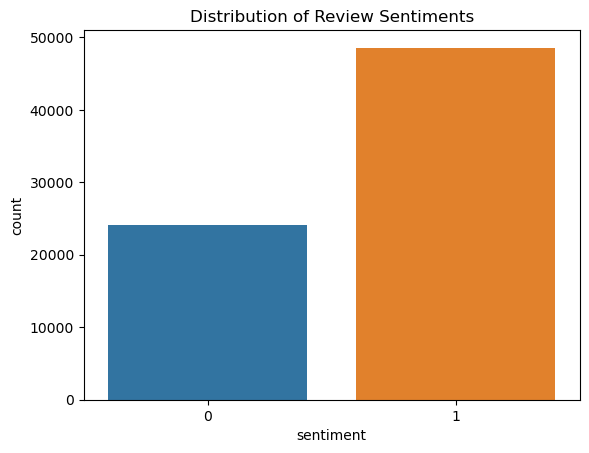

In [11]:
# Technique 1: Visualize the distribution of review sentiments

# Create a new column called "sentiment" and assign 1 to positive reviews and 0 to negative reviews
df['sentiment'] = np.where(df['star_rating'] > 3, 1, 0)

# Plot the distribution of review sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Review Sentiments')
plt.show()


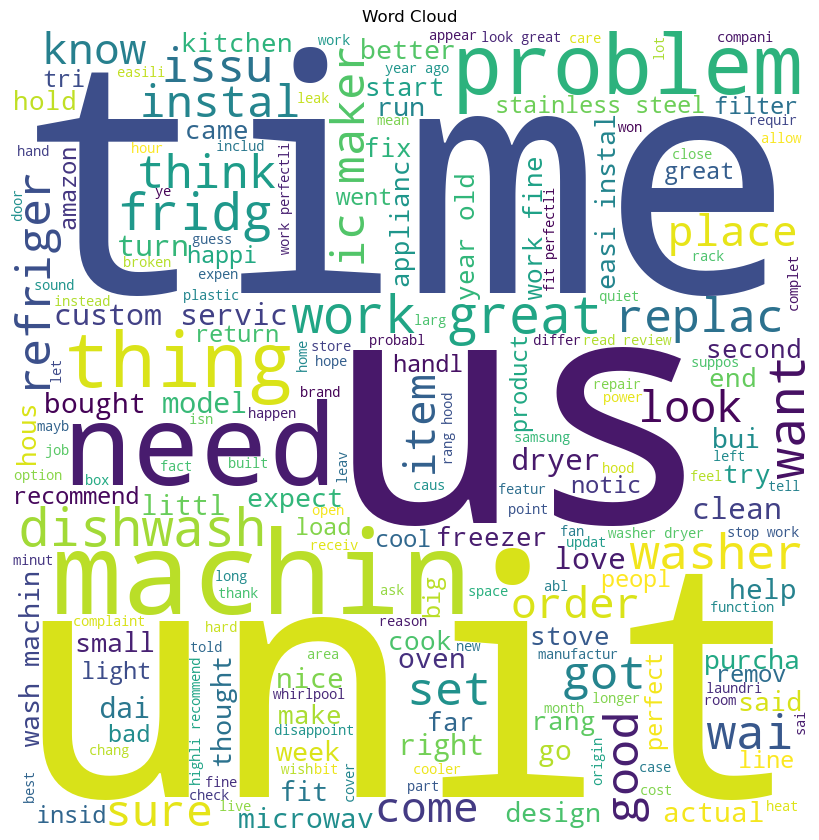

In [12]:
# Technique 2: Create and plot a word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(' '.join(df['preprocessed_review']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud')
plt.show()

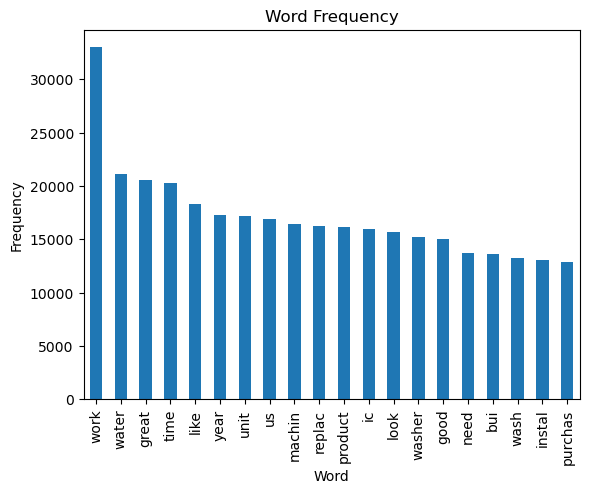

In [13]:
# Technique 3: Create a word frequency plot
word_freq = pd.Series(' '.join(df['preprocessed_review']).split()).value_counts()[:20]
word_freq.plot(kind='bar')
plt.title('Word Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

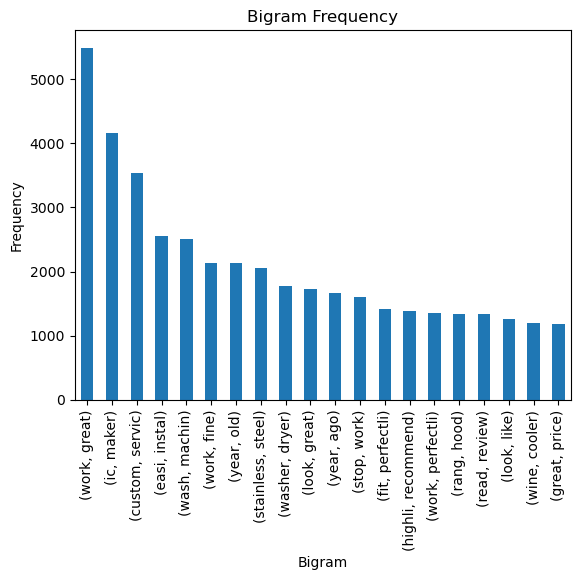

In [14]:
import nltk
# Technique 4: Create a bigram frequency plot
bigram_freq = pd.Series(nltk.ngrams(' '.join(df['preprocessed_review']).split(), 2)).value_counts()[:20]
bigram_freq.plot(kind='bar')
plt.title('Bigram Frequency')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.show()

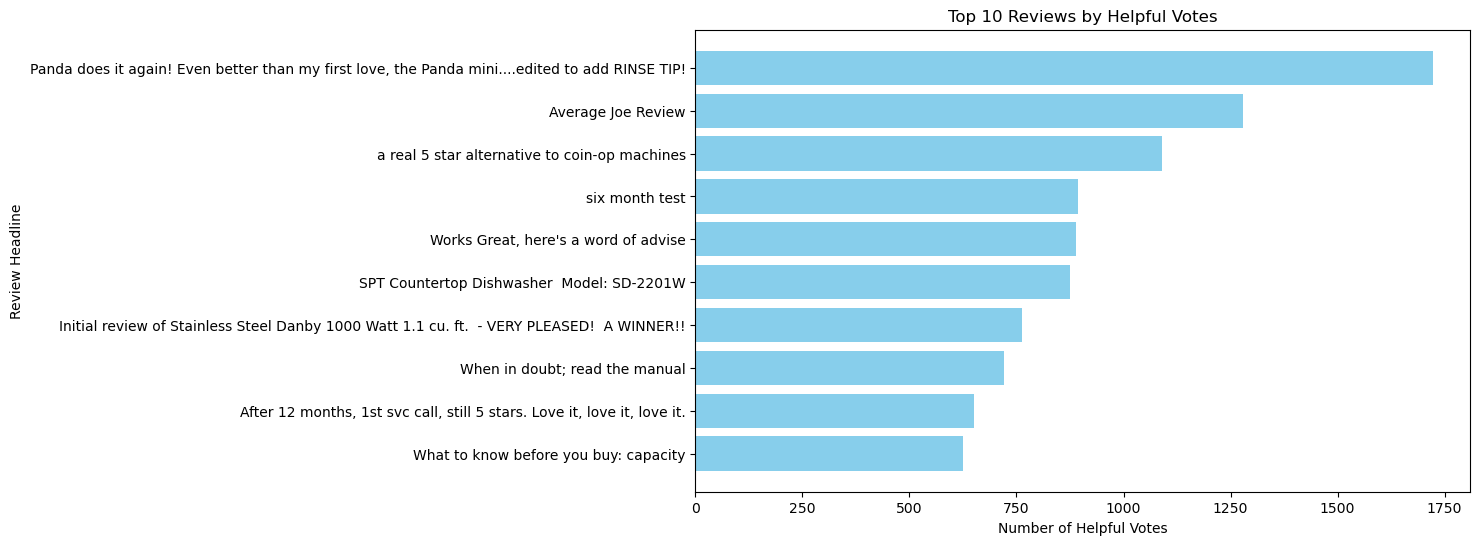

In [15]:
# Technique 5: Visualize the top N reviews by helpful votes

# Sort the DataFrame by helpful_votes in descending order
df_sorted = df.sort_values(by='helpful_votes', ascending=False)

# Choose the top N reviews to visualize
top_n_reviews = df_sorted.head(10)  # Adjust the number as needed

# Plot the top N reviews (showing titles or summaries)
plt.figure(figsize=(10, 6))
plt.barh(top_n_reviews['review_headline'], top_n_reviews['helpful_votes'], color='skyblue')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Review Headline')
plt.title('Top 10 Reviews by Helpful Votes')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest voted review at the top
plt.show()


___

**2. Before implementing off-the-shelf topic models, it is useful to consider how to process data for topic analysis. Consider what you have learned so far to generate a processing function and discuss your findings. This should only operate on a word level!**

Below is a snippet to fetch some examples from the review corpus. You can use these to test your output.

In [16]:
reviews = df["review_body"].sample(frac=1).tolist()
for review in reviews[:5]:
    print(review)

It broke within the 1st 15 min. of using it, leaving my clothes sopping wet.  Very disappointing and upsetting.  At least Amazon  returns are fast and reliable.
I ordered this as a replacement and my wife has thanked me several times because it is so much better than the original.
OK, we received this 3 days ago, I installed it and did a small load of wash of course just to check it out, it work exectly as advertised.  Then today I decided to do another load of wash and the thing didn't light up!  A quick check showed that the AC/DC adapter was not working, it had an output of .1mv instead of 12v.  We called EdenPure customer service to get the AC/DC adapter replaced and they told us we would have to return the entire package and they would send a new unit,(which are on back-order at this time). It is their company policy NOT to have replacement parts such as this adapter and they expect you to pay your money up front and then set and wait until they are good and ready to replace a bad

In [17]:
from typing import List
import gensim
from nltk.stem import SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS as stopwords

# A preprocessing function to gather words/groups of words/chunks considered important for topic analysis/modeling
# source: Kochmar ch. 10

# Create a stemmer with the Snowball algorithm for English language 
stemmer = SnowballStemmer("english")

# Define a function to stem words
def stem(word):
    return stemmer.stem(word)

# Define a function to preprocess a document
def preprocess_for_topic(document: str) -> List[str]:
    """
    Preprocesses a document
    Args:
        document (str): The input document to be preprocessed.
    Returns:
        List[str]: A list of words obtained by splitting the document.

    Example:
        input: "This is a test."
        output: ["This", "is", "a", "test."]
    """

    # Tokenize and preprocess the document
    result = []
    for token in gensim.utils.simple_preprocess(document, min_len=4):
        if token not in stopwords:
            result.append(stem(token))

    return result


In [18]:
# Test the function
reviews = df["review_body"].sample(frac=1).tolist()
for review in reviews[:5]:
    print(f"* Original review: {review}")
    print(f"* Preprocessed review: {preprocess_for_topic(review)}")
    print("------")

* Original review: The push buttons are ok but occasionally have to push harder to operate.
* Preprocessed review: ['push', 'button', 'occasion', 'push', 'harder', 'oper']
------
* Original review: !!! I DO NOT RECOMMEND THIS PRODUCT>!!!   I did some research before I bought this dishwasher. All were stating how great it cleaned esp on the steam cycle. I agree it does clean well but- it takes 3-4 hours to run the cycle. It's not too loud but you definately hear it. This BIG COMPLAINT I have is the quality of the interior. The wheels on the bottom rack fall off- ALL THE TIME! Making it impossible to bring out of the dishwasher and put it back in. I had to lift it and push it in and pull it back out. It started within the first month. Finally the jetdry thing stopped working. I called them after owning it after only 8 months. The first repair man was nice and ordered the parts. The second repairman was rude and said maytag would not replace the wheels again after this and the warrenty fr

The function correctly tokenizes the text, removes stopwords, and stems the remaining words. For example, given the review "Just got these, seem pretty good for the money and they list their filtration credentials on the website.  Easy to install.  Water tastes good.  Seems ligit.", the function outputs ['pretti', 'good', 'money', 'list', 'filtrat', 'credenti', 'websit', 'easi', 'instal', 'water', 'tast', 'good', 'ligit'].

This way, meaningful information is extracted from the text to ensure that the topics generated by the model are focused on the most relevant text in the corpus.


___
**3. Using the same data, implement a topic model with LDA using the Gensim library. Experiment with different topic counts (e.g., 3) and retrieve the top 5 words from each. Discuss your findings.**

In [19]:
# Preprocess the documents
processed_docs = df["review_body"].map(preprocess_for_topic)
print(len(processed_docs))

# Convert word content of the documents into a dictionary of unique words
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary))

# Filter out tokens that appear in less than 10 documents and more than 50% of the documents to reduce the size of the dictionary
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)
print(len(dictionary))
 
# Create a bag-of-words corpus to represent the documents using this dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(bow_corpus[0])

72621
23269
5497
[(0, 1), (1, 4), (2, 1), (3, 2), (4, 2), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 4), (39, 1), (40, 2), (41, 3), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 6), (53, 1), (54, 2), (55, 2), (56, 1), (57, 1), (58, 4), (59, 1)]


In [20]:
# Check word stems behind ids from the dictionary
bow_doc = bow_corpus[0]
 
for i in range(len(bow_doc)):
    print(f"Key {bow_doc[i][0]} =\"{dictionary[bow_doc[i][0]]}\":\
    occurrences={bow_doc[i][1]}")

Key 0 ="amazon":    occurrences=1
Key 1 ="avanti":    occurrences=4
Key 2 ="base":    occurrences=1
Key 3 ="beverag":    occurrences=2
Key 4 ="center":    occurrences=2
Key 5 ="compani":    occurrences=2
Key 6 ="complaint":    occurrences=1
Key 7 ="cover":    occurrences=1
Key 8 ="die":    occurrences=2
Key 9 ="differ":    occurrences=1
Key 10 ="document":    occurrences=1
Key 11 ="door":    occurrences=1
Key 12 ="expect":    occurrences=1
Key 13 ="expens":    occurrences=1
Key 14 ="explain":    occurrences=1
Key 15 ="fail":    occurrences=2
Key 16 ="fridg":    occurrences=1
Key 17 ="given":    occurrences=1
Key 18 ="glass":    occurrences=1
Key 19 ="good":    occurrences=1
Key 20 ="grape":    occurrences=1
Key 21 ="half":    occurrences=2
Key 22 ="have":    occurrences=1
Key 23 ="high":    occurrences=1
Key 24 ="hope":    occurrences=1
Key 25 ="issu":    occurrences=1
Key 26 ="lemon":    occurrences=1
Key 27 ="local":    occurrences=1
Key 28 ="longer":    occurrences=1
Key 29 ="manufa

In [21]:
# Train the LDA model
id2word = dictionary
corpus = bow_corpus

num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, # input corpus
                                           id2word=id2word, # mapping from word IDs to words
                                           num_topics=num_topics, # number of topics to be extracted from the corpus
                                           random_state=100, #ensures the same results every time you run the code which is useful for debugging
                                           update_every=1, # determines how often the model parameters should be updated
                                           chunksize=1000, # number of documents to be used in each training chunk
                                           passes=10, # number of passes through the entire corpus during training 
                                           alpha='symmetric', # determines the distribution of topics in documents
                                           iterations=100, # maximum number of iterations through the corpus when inferring the topic distribution of a corpus
                                           per_word_topics=True # if True, the model also returns the word-topic relevance for each word in the corpus
                                           )

In [22]:
# Retrieve the top 5 words from each topic
top_words_per_topic = []
for topic_id in range(num_topics):
    top_words = lda_model.get_topic_terms(topic_id, topn=5)  # Get top 5 words for each topic
    top_words = [id2word[word_id] for word_id, prob in top_words]  # Convert word IDs to actual words
    top_words_per_topic.append(top_words)

# Print the top 5 words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic {i}: {', '.join(top_words)}")

Topic 0: year, servic, replac, repair, month
Topic 1: dishwash, dish, clean, rack, bosch
Topic 2: washer, machin, cloth, dryer, wash
Topic 3: look, instal, light, hood, unit
Topic 4: small, work, littl, water, drain
Topic 5: unit, order, amazon, return, product
Topic 6: fridg, freezer, wine, bottl, unit
Topic 7: great, work, perfect, price, good
Topic 8: oven, microwav, cook, heat, stove
Topic 9: water, door, filter, maker, open


In [23]:
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.154360 -0.213159       1        1  14.097875
6     -0.054213  0.122507       2        1  12.630045
2     -0.144385 -0.050161       3        1  11.652433
3      0.001412  0.135967       4        1  10.608745
4     -0.038946  0.108026       5        1  10.142324
5      0.214517 -0.122414       6        1  10.067629
9     -0.098895 -0.138261       7        1   9.461210
7      0.271204  0.170951       8        1   7.942093
1     -0.160748 -0.036435       9        1   7.262634
8     -0.144305  0.022977      10        1   6.135012, topic_info=           Term          Freq         Total Category  logprob  loglift
99        great  20241.000000  20241.000000  Default  30.0000  30.0000
185      washer  15522.000000  15522.000000  Default  29.0000  29.0000
57         work  32283.000000  32283.000000  Default  28.0000  28.0000
76        water  21721.000000  21721.000000  Default  27.0000  27.0000
418      machin  16480.000000  16480.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
366       minut    834.878193   4869.057603  Topic10  -5.1360   1.0278
135     kitchen    856.083846   5899.296986  Topic10  -5.1109   0.8609
255       thing    812.638977   9604.516801  Topic10  -5.1630   0.3215
303  temperatur    779.689778   5431.762764  Topic10  -5.2044   0.8500
57         work    774.775083  32283.889645  Topic10  -5.2107  -0.9386

[676 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3147     10  0.994971  accident
1609      5  0.999137     adapt
2797      6  0.996284       add
1545      9  0.997301     agent
1012      3  0.999486      agit
...     ...       ...       ...
58        9  0.062425      year
58       10  0.037296      year
3763      8  0.990598    yellow
1497      6  0.999215    youtub
248       2  0.998761      zone

[1351 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 3, 4, 5, 6, 10, 8, 2, 9])

___
**4. With the LDA model you trained above, perform topic prediction on a sample from the test dataset, and do a simple empirical evaluation of the results.**

In [24]:
import random
test_df = pd.read_csv("./data/amazon_test.csv")
test_reviews = test_df["review_body"].tolist()

# some reviews are looong. let's filter out some on length.
test_reviews = [review for review in test_reviews if len(str(review).split()) < 30]
test_reviews = random.sample(population=test_reviews, k=10)
test_reviews

['Well pleased',
 'The ad was in the freezer section and that is why I ordered it.  To my dismay it was a refrigerator. I just kept it',
 'Takes forever to make a entire container of ice. Noisy, large and expensive. Cubes stick together and the ret is somewhat slushy.',
 'Had mine for 2 years then gasket broke. At 3 years the computer broke. Would not recommend.',
 "I'm not the biggest advocate for products made in China and well this product is horrible.",
 'Needed a utensil basket for my dishwasher.  The price was right. and its a universal basket so it fits perfectly.',
 'Very disappointed.  Cheap paper labels',
 'I & my wife love this little machine it is perfect for the two of us. .',
 'Part fit perfectly.  Good Price/Value.  Easy to install.  Washer works like when new.',
 'The vent works great not too loud and gets the job done. I installed it myself with no problems, i hardwired it.']

In [25]:
# Preprocess the documents
processed_test_docs = [preprocess_for_topic(review) for review in test_reviews]

# Create a bag-of-words corpus to represent the documents using the dictionary
bow_test_corpus = [dictionary.doc2bow(doc) for doc in processed_test_docs]

# Predict topics for the test documents 
# Print the review, predicted topic, which words are contained within the predicted topic, along with the confidence score.
for i, doc in enumerate(bow_test_corpus):
    print(f"Review {i}: {test_reviews[i]}")
    predicted_topics = lda_model.get_document_topics(doc)
    predicted_topic_id, confidence_score = max(predicted_topics, key=lambda x: x[1])
    print(f"Predicted topic: Topic {predicted_topic_id} with confidence score {confidence_score}")
    words_in_predicted_topic = lda_model.show_topic(predicted_topic_id)
    top_words = [word for word, prob in words_in_predicted_topic]
    print(f"Words in the predicted topic: {', '.join(top_words)}")
    print("------")

Review 0: Well pleased
Predicted topic: Topic 7 with confidence score 0.5499734878540039
Words in the predicted topic: great, work, perfect, price, good, product, easi, instal, look, replac
------
Review 1: The ad was in the freezer section and that is why I ordered it.  To my dismay it was a refrigerator. I just kept it
Predicted topic: Topic 6 with confidence score 0.5388151407241821
Words in the predicted topic: fridg, freezer, wine, bottl, unit, temperatur, refriger, cool, cold, cooler
------
Review 2: Takes forever to make a entire container of ice. Noisy, large and expensive. Cubes stick together and the ret is somewhat slushy.
Predicted topic: Topic 9 with confidence score 0.6071053147315979
Words in the predicted topic: water, door, filter, maker, open, make, cube, plastic, dispens, like
------
Review 3: Had mine for 2 years then gasket broke. At 3 years the computer broke. Would not recommend.
Predicted topic: Topic 0 with confidence score 0.7096135020256042
Words in the predi

Evaluation:

Reviews 0, 5, 7, 8 and 9 are predicted to belong to Topic 7, which is associated with words like "great," "work," "perfect," "price," and "good," indicating a positive sentiment about the product. After reading the review body, this seems to be an accurate evaulation of a positive review. 

Reviews 1, 2, 3 and 6 are all predicted to belong to different topics, although all the reviews have a negative sentiment. Thus, these predictions reveal potential underlying topics of the negative reviews. 

___

# Named Entity Recognition

Previously, you learned about noun phrases. Noun phrases such as "The slow white fox", a person "Name Nameson", a place "Mount Doom" or company names "NTNU", are some examples of what we consider *named entities*.


**1. Can you think of named entity categories that are *not* noun phrases?**

Yes, named entity categories that are not noun phrases include:

- Dates and times (e.g., "11. januar", "13:00")
- Numbers and quantities (e.g., "20", "twenty")
- Locations and addresses (e.g., "park", "Høgskoleringen 2")
- Organizations and institutions (e.g., "Freia", "NTNU")
- Personal titles and names (e.g., "Dr. Ola Nordmann")
- URLs and email addresses (e.g., "www.ntnu.no", "info@ntnu.no")

___

Disambiguating (or entity linking) named entities is a crucial task to applications of NER and considers the problem of assigning an identifier to each entity, i.e., linking relevant entities together. The disambiguation process often incorporates external knowledge (knowledge bases).


Consider the sentences:

- "I ate an apple in New York"
- "New York Times wrote an article about Apple"
- "New York is also known as the Big Apple"

**2. How would you tackle the task of distinguishing the entities found here? Describe your approach either in text or by code.**

It is necessary to conside the surrounding context of the entity. This context includes the words and phrases that appear before and after the entity. For example, for the text "New York Times wrote an article about Apple", the word "Apple" could refer to either the fruit or the organization. However, by looking at the context, the entity can be disambiguated by identifying "wrote" and "article" nearby, making it more likely that "Apple" refers to the organization. This analysis can be performed with sequential rules on how words are put together in a sentence, as well as evaluating if preceeding words also are entities. 

___

**3. Load the reviews dataset, and extract named entities and their category from 100 reviews. Visualize the named entity categories and their frequencies.**

- For visualization, you can use tables or plots (e.g. `matplotlib` or `seaborn`)

/Users/groelisabeth/anaconda3/envs/tdt4310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/groelisabeth/anaconda3/envs/tdt4310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


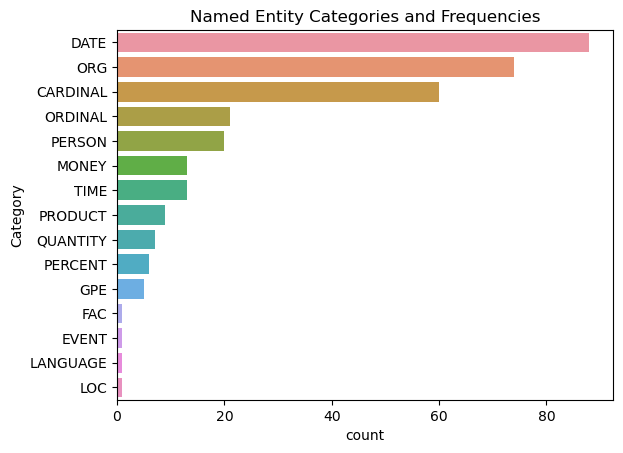

In [26]:
# Load the reviews dataset
df = pd.read_csv("./data/amazon_train.csv")

# extract named entities and their category from 100 reviews. 
import spacy
nlp = spacy.load("en_core_web_sm")

# Extract named entities and their categories from the first 100 reviews
named_entities = []
for review in df["review_body"].head(100):
    doc = nlp(review)
    for entity in doc.ents:
        named_entities.append((entity.text, entity.label_))

# Create a DataFrame from the named entities
named_entities_df = pd.DataFrame(named_entities, columns=["Entity", "Category"])

# Visualize the named entity categories and their frequencies
sns.countplot(y="Category", data=named_entities_df, order=named_entities_df["Category"].value_counts().index)
plt.title("Named Entity Categories and Frequencies")
plt.show()
